### **`Data Preprocessing`**

In [40]:
import pandas as pd

# read the dataset file
df = pd.read_csv('./ckd-dataset-v2.csv')

# check the top 5 rows of dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [41]:
# as we can see row 0 and 1 contain garbadge values so we can delete these two rows
df.drop([0,1],axis=0,inplace=True)

# reset the index after droping row 1 and 2
df = df.reset_index(drop=True)

# again check the top 5 extries 
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [42]:
# check if there is any null/NaN entry present in our dataframe
df.isnull().values.any()

False

As we can see we don't have any `row/column` having `Null/NaN` value in it

In [43]:
# seperate features and target variables 
X = df.drop(['class'], axis=1)
Y = df['class']

From now `X` and `Y` is our `Feature` and `Target` columns respectively

In [44]:
# check for unique classes in target column
Y.unique()

array(['ckd', 'notckd'], dtype=object)

In [45]:
# convert the categories of target ("ckd", "notckd") to (1, 0) 
Y = Y.map({'ckd': 1, 'notckd': 0})

<AxesSubplot: >

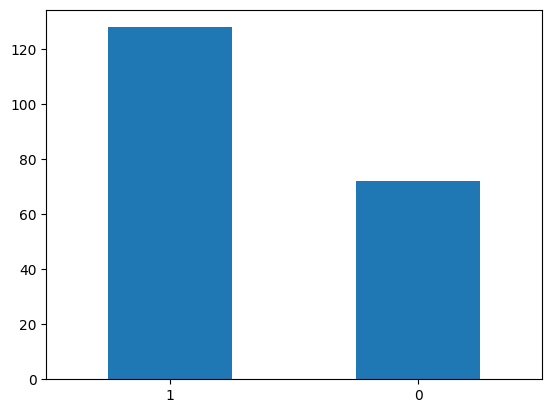

In [46]:
# Check for class imballance problem
Y.value_counts().plot.bar(rot=0)

we are having **`70-75` notckd** and almost **`125 ckd`** data points. <br />
So, we could say that we don't have serious `class-imballance` problem in dataset. <br />
Now our focus is on `Feature valiables`

In [47]:
X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,0,< 0,0,0,0,< 112,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [48]:
X['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

Convert the categories of **`stage`** column (s1, s2,...) in to number (1, 2,...)

In [49]:
X['stage'] = X['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})